In [1]:
import keras
import numpy as np

from keras import regularizers, optimizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv2D,Input,Dense,Activation,MaxPooling2D,BatchNormalization,ZeroPadding2D,Flatten,Dropout
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, CSVLogger,EarlyStopping,ModelCheckpoint
from numpy.random import permutation


Using TensorFlow backend.
/home/asif4014/anaconda3/envs/newenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/asif4014/anaconda3/envs/newenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/asif4014/anaconda3/envs/newenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/asif4014

In [2]:
# Initialising the CNN
classifier = Sequential()
classifier.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(60,60,3))) #input_shape = 60,60,3
# Learnable parameter = kernel_parameter + bias = (3*3*3)*32 + 32 = 896
classifier.add(Conv2D(64, (3, 3), activation='relu'))
# Learnable parameter = kernel_parameter + bias = (3*3*32)*64 + 64 = 18496
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Dropout(0.25))
classifier.add(Flatten())

classifier.add(Dense(128, activation='relu'))
# Learnable parameter = 50176*128+128 = 6422656
classifier.add(Dropout(0.5))

classifier.add(Dense(3, activation='softmax'))
# Learnable parameter = 128*3+3 = 387
classifier.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 58, 58, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               6422656   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)             

In [3]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [4]:
es_cb = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

In [5]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Tomato/train_set',target_size = (60, 60),batch_size = 10)

test_set = test_datagen.flow_from_directory('Tomato/test_set',target_size = (60, 60),batch_size = 10)

model = classifier.fit_generator(training_set,steps_per_epoch = 250,epochs = 20,validation_data = test_set,callbacks=[es_cb],validation_steps = 50)

classifier.save("tomato_classifier.h5")
print("Saved model to disk")


Found 1500 images belonging to 3 classes.
Found 300 images belonging to 3 classes.

Epoch 1/20
250/250 [==============================] - 64s 255ms/step - loss: 0.5802 - accuracy: 0.7376 - val_loss: 0.1136 - val_accuracy: 0.9260
Epoch 2/20
250/250 [==============================] - 68s 273ms/step - loss: 0.2349 - accuracy: 0.9088 - val_loss: 0.1268 - val_accuracy: 0.8980
Epoch 3/20
  1/250 [..............................] - ETA: 1:00 - loss: 0.3237 - accuracy: 0.8000

/home/asif4014/anaconda3/envs/newenv/lib/python3.6/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.247390). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


250/250 [==============================] - 95s 381ms/step - loss: 0.1494 - accuracy: 0.9464 - val_loss: 0.1989 - val_accuracy: 0.8980
Epoch 4/20
250/250 [==============================] - 57s 228ms/step - loss: 0.0770 - accuracy: 0.9720 - val_loss: 0.0830 - val_accuracy: 0.9460
Epoch 5/20
250/250 [==============================] - 59s 237ms/step - loss: 0.0813 - accuracy: 0.9716 - val_loss: 0.3341 - val_accuracy: 0.8480
Epoch 6/20
250/250 [==============================] - 59s 235ms/step - loss: 0.0703 - accuracy: 0.9752 - val_loss: 7.5127e-04 - val_accuracy: 0.9000
Epoch 7/20
250/250 [==============================] - 87s 347ms/step - loss: 0.0605 - accuracy: 0.9808 - val_loss: 0.6266 - val_accuracy: 0.9260
Epoch 8/20
250/250 [==============================] - 63s 252ms/step - loss: 0.0316 - accuracy: 0.9900 - val_loss: 0.0672 - val_accuracy: 0.9380
Epoch 9/20
250/250 [==============================] - 59s 238ms/step - loss: 0.0277 - accuracy: 0.9932 - val_loss: 0.1838 - val_accuracy:

In [6]:
loss,acc = classifier.evaluate(training_set,verbose=0)
print("Loss on train data:",(loss*100))
print("Accuracy on train data:",(acc*100))

Loss on train data: 15.060244500637054
Accuracy on train data: 97.93333411216736


In [7]:
loss,acc = classifier.evaluate(test_set,verbose=0)
print("Loss on test data:",(loss*100))
print("Accuracy on test data:",(acc*100))

Loss on test data: 5.4678745567798615
Accuracy on test data: 88.33333253860474


### Prediction(testing)

In [2]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt 

Using TensorFlow backend.
/home/asif4014/anaconda3/envs/newenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/asif4014/anaconda3/envs/newenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/asif4014/anaconda3/envs/newenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/asif4014

(1000, 1000, 3)


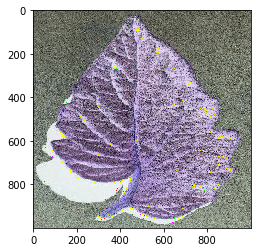

In [6]:
test_image = image.load_img('Tomato/test_set/Healthy/2(healthy).JPG', target_size = (60, 60))
test_image = image.img_to_array(test_image)
print(test_image.shape)

plt.imshow((test_image*255).astype(np.uint8))


In [13]:
test_image = np.expand_dims(test_image,axis=0)
print(test_image.shape)
result = classifier.predict(test_image)
print(result)


(1, 60, 60, 3)
[[0. 0. 1.]]


In [16]:
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Bacterial_spot'
elif result[0][1] == 1:
    prediction = 'Early_blight'
else:
    prediction = 'Healthy'
    
print('Given pic is:',prediction)
    

Given pic is: Healthy


In [14]:
training_set.class_indices             # It gives dictionary.

{'Bacterial_spot': 0, 'Early_blight': 1, 'Healthy': 2}